# Restaurant Revenue Data Analysys
## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Loading the dataset

In [2]:
dataset = pd.read_csv('cleaned_kidney_disease.csv')

In [3]:
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.0200,1.0,0.000000,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,9.0,55.0,1.0200,4.0,0.000000,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.0100,2.0,1.125356,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.0075,4.0,0.000000,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.0100,2.0,0.000000,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.0200,0.0,0.000000,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396.0,42.0,70.0,1.0250,0.0,0.000000,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397.0,12.0,80.0,1.0200,0.0,0.000000,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398.0,17.0,60.0,1.0250,0.0,0.000000,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


## Check Basic Information

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [5]:
dataset.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [6]:
dataset.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

## Categorizing Numerical and Categorical Columns

In [7]:
def quanqual(dataset):
    quan = []
    qual = []
    for ColumnName in dataset.columns:
        if dataset[ColumnName].dtype == 'O':  
            qual.append(ColumnName)
        else:
            quan.append(ColumnName) 
    return quan,qual

In [8]:
quan, qual=quanqual(dataset)

In [9]:
quan

['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [10]:
qual

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

## Statistical Summary

In [11]:
def Univariate(dataset,quan):
    descriptive = pd.DataFrame(index=['mean','median','mode','Q1:25%','Q2:50%','Q3:75%','Q4:100%','IQR','1.5rule',
                                      'lesser','greater','min','max','skew','kurtosis'], columns=quan)

    for ColumnName in quan:
        descriptive.loc['mean', ColumnName] = dataset[ColumnName].mean()
        descriptive.loc['median', ColumnName] = dataset[ColumnName].median()
        descriptive.loc['mode', ColumnName] = dataset[ColumnName].mode()[0]
        descriptive.loc['Q1:25%', ColumnName] = dataset[ColumnName].quantile(0.25)
        descriptive.loc['Q2:50%', ColumnName] = dataset[ColumnName].quantile(0.50)
        descriptive.loc['Q3:75%', ColumnName] = dataset[ColumnName].quantile(0.75)
        descriptive.loc['99%', ColumnName] = np.percentile(dataset[ColumnName], 99)
        descriptive.loc['Q4:100%', ColumnName] = dataset[ColumnName].max()
        descriptive.loc['IQR', ColumnName] = descriptive.loc['Q3:75%', ColumnName] - descriptive.loc['Q1:25%', ColumnName]
        descriptive.loc['1.5rule', ColumnName] = 1.5 * descriptive.loc['IQR', ColumnName]
        descriptive.loc['lesser', ColumnName] = descriptive.loc['Q1:25%', ColumnName] - descriptive.loc['1.5rule', ColumnName]
        descriptive.loc['greater', ColumnName] = descriptive.loc['Q3:75%', ColumnName] + descriptive.loc['1.5rule', ColumnName]
        descriptive.loc['min', ColumnName] = dataset[ColumnName].min()
        descriptive.loc['max', ColumnName] = dataset[ColumnName].max()
        descriptive.loc['skew', ColumnName]=dataset[ColumnName].skew()
        descriptive.loc['kurtosis', ColumnName]=dataset[ColumnName].kurtosis()
        descriptive.loc['var', ColumnName]=dataset[ColumnName].var()
        descriptive.loc['std', ColumnName]=dataset[ColumnName].std()

    return descriptive

In [12]:
Univariate(dataset,quan)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
mean,199.5,51.568376,75.719072,1.017452,1.016949,0.222685,136.985267,51.010409,2.254129,138.115004,4.432744,12.532937
median,199.5,54.0,78.234536,1.017408,1.0,0.0,126.0,44.0,1.4,137.528754,4.627244,12.526437
mode,0.0,60.0,80.0,1.02,0.0,0.0,223.5,113.875,6.331136,137.528754,4.627244,12.526437
Q1:25%,99.75,42.0,70.0,1.015,0.0,0.0,101.0,27.0,0.9,135.0,4.0,10.875
Q2:50%,199.5,54.0,78.234536,1.017408,1.0,0.0,126.0,44.0,1.4,137.528754,4.627244,12.526437
Q3:75%,299.25,64.0,80.0,1.02,2.0,0.450142,150.0,61.75,3.072454,141.0,4.8,14.625
Q4:100%,399.0,90.0,95.0,1.025,5.0,1.125356,223.5,113.875,6.331136,150.0,6.0,17.8
IQR,199.5,22.0,10.0,0.005,2.0,0.450142,49.0,34.75,2.172454,6.0,0.8,3.75
1.5rule,299.25,33.0,15.0,0.0075,3.0,0.675214,73.5,52.125,3.258681,9.0,1.2,5.625
lesser,-199.5,9.0,55.0,1.0075,-3.0,-0.675214,27.5,-25.125,-2.358681,126.0,2.8,5.25


## Frequency

In [13]:
def freqTable(columnName,dataset):
    freqTable=pd.DataFrame(columns=['unique_values','frequency','Relative frequency','cusum'])
    freqTable['unique_values']=dataset[columnName].value_counts().index
    freqTable['frequency']=dataset[columnName].value_counts().values
    freqTable['Relative frequency']=(freqTable['frequency']/103)
    freqTable['cusum']=freqTable['Relative frequency'].cumsum()
    return freqTable

In [14]:
freqTable('bp',dataset)

,unique_values,frequency,Relative frequency,cusum
0,80.000000,116,1.126214,1.126214
1,70.000000,112,1.087379,2.213592
2,60.000000,71,0.689320,2.902913
3,90.000000,53,0.514563,3.417476
4,95.000000,31,0.300971,3.718447
5,76.469072,12,0.116505,3.834951
6,55.000000,5,0.048544,3.883495


## Basic Univariate Analysys

In [15]:
bp_series = dataset['bp']

In [16]:
bp_series

0      80.0
1      55.0
2      80.0
3      70.0
4      80.0
       ... 
395    80.0
396    70.0
397    80.0
398    60.0
399    80.0
Name: bp, Length: 400, dtype: float64

In [17]:
mean = bp_series.mean()
median = bp_series.median()
mode = bp_series.mode().iloc[0]  # Get the first mode value
skewness = stats.skew(bp_series)
kurtosis = stats.kurtosis(bp_series)
std_dev = bp_series.std()

In [18]:
print("bp mean value:", mean)
print("bp median value:", median)
print("bp mode value:", mode)
print("bp skew value:", skewness)
print("bp kurtosis value:", kurtosis)
print("bp std deviation value:", std_dev)

bp mean value: 75.71907216494844
bp median value: 78.23453608247422
bp mode value: 80.0
bp skew value: 0.08507943816439179
bp kurtosis value: -0.9177263048627564
bp std deviation value: 10.947479100643157


## Skewness and Kurtosis

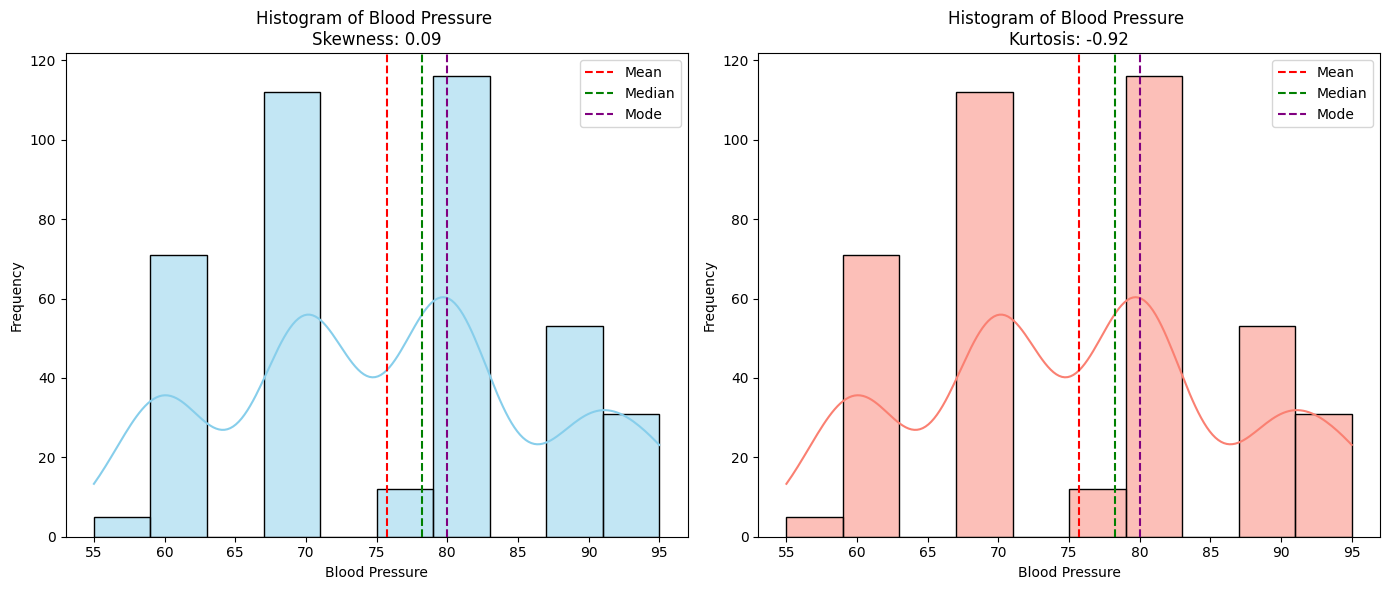

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(bp_series, bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].axvline(mean, color='red', linestyle='--', label='Mean')
axes[0].axvline(median, color='green', linestyle='--', label='Median')
axes[0].axvline(mode, color='purple', linestyle='--', label='Mode')
axes[0].set_title(f'Histogram of Blood Pressure \nSkewness: {skewness:.2f}')
axes[0].set_xlabel('Blood Pressure')
axes[0].set_ylabel('Frequency')
axes[0].legend()

sns.histplot(bp_series, bins=10, kde=True, ax=axes[1], color='salmon')
axes[1].axvline(mean, color='red', linestyle='--', label='Mean')
axes[1].axvline(median, color='green', linestyle='--', label='Median')
axes[1].axvline(mode, color='purple', linestyle='--', label='Mode')
axes[1].set_title(f'Histogram of Blood Pressure \nKurtosis: {kurtosis:.2f}')
axes[1].set_xlabel('Blood Pressure')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


## Normal Distribution

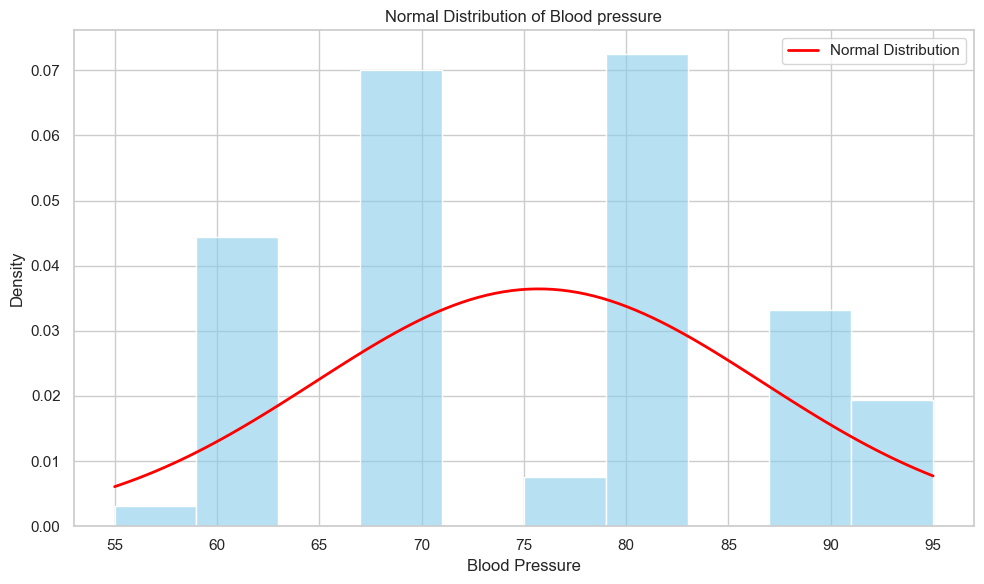

In [20]:
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(bp_series, bins=10, kde=False, color='skyblue', stat="density", alpha=0.6)

# Generate the x values for the normal distribution curve
x = np.linspace(bp_series.min(), bp_series.max(), 100)
# Calculate the normal distribution curve
y = stats.norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.plot(x, y, color='red', label='Normal Distribution', linewidth=2)

# Add titles and labels
plt.title('Normal Distribution of Blood pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Probability Density Function

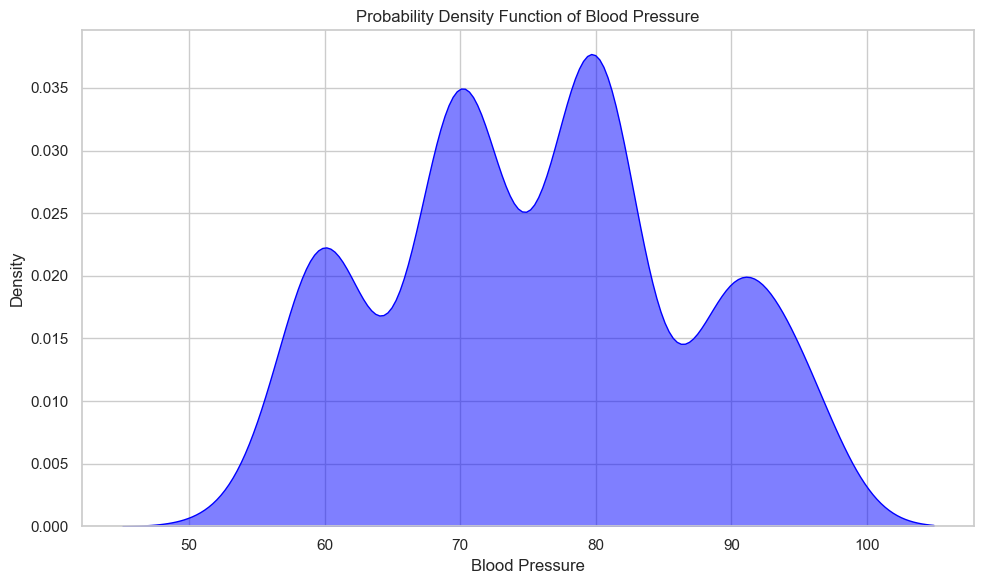

In [21]:
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the KDE for the Probability Density Function
sns.kdeplot(bp_series, color='blue', fill=True, alpha=0.5)

# Add titles and labels
plt.title('Probability Density Function of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()

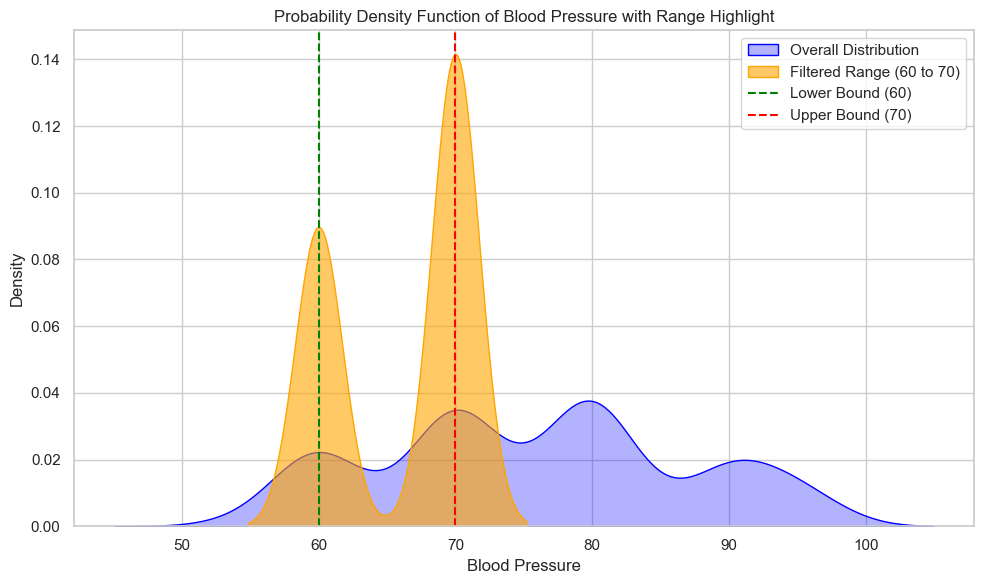

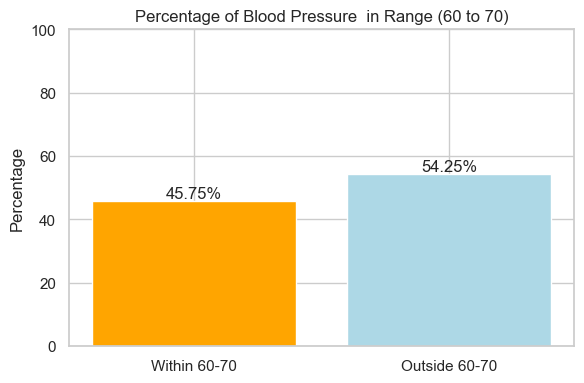

In [22]:
# Define the range for filtering
lower_bound = 60
upper_bound = 70

# Calculate the percentage of values within the specified range
filtered_data = bp_series[(bp_series >= lower_bound) & (bp_series <= upper_bound)]
percentage_in_range = (len(filtered_data) / len(bp_series)) * 100

sns.set(style="whitegrid")

# Create the figure for KDE
plt.figure(figsize=(10, 6))

# Plot the KDE for the Probability Density Function in the specified range
sns.kdeplot(bp_series, color='blue', fill=True, alpha=0.3, label='Overall Distribution')
sns.kdeplot(filtered_data, color='orange', fill=True, alpha=0.6, label='Filtered Range (60 to 70)')

# Add vertical lines for the range
plt.axvline(lower_bound, color='green', linestyle='--', label='Lower Bound (60)')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound (70)')

# Add titles and labels
plt.title('Probability Density Function of Blood Pressure with Range Highlight')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Create a bar plot for percentage representation
plt.figure(figsize=(6, 4))
plt.bar(['Within 60-70', 'Outside 60-70'], [percentage_in_range, 100 - percentage_in_range], color=['orange', 'lightblue'])
plt.title('Percentage of Blood Pressure  in Range (60 to 70)')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Show the percentage value on top of the bars
for index, value in enumerate([percentage_in_range, 100 - percentage_in_range]):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

# Show the bar plot
plt.tight_layout()
plt.show()

## Standard Normal Distributions

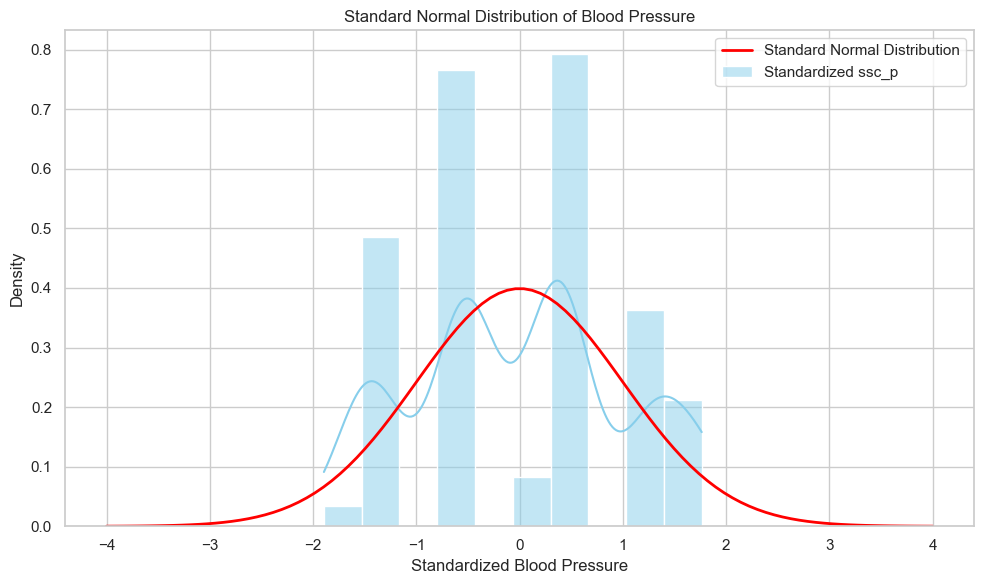

In [23]:
from scipy.stats import norm

mean = np.mean(bp_series)
std_dev = np.std(bp_series)

# Standardize the ssc_p ratings
standardized_data = (bp_series - mean) / std_dev

# Create a range of values for plotting the standard normal distribution
x_values = np.linspace(-4, 4, 100)  # Range for the standard normal distribution
y_values = norm.pdf(x_values, 0, 1)  # PDF for standard normal distribution

# Set the style for the plots
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the standardized data's histogram
sns.histplot(standardized_data, bins=10, kde=True, color='skyblue', stat='density', label='Standardized ssc_p')

# Plot the standard normal distribution curve
plt.plot(x_values, y_values, color='red', label='Standard Normal Distribution', lw=2)

# Add titles and labels
plt.title('Standard Normal Distribution of Blood Pressure')
plt.xlabel('Standardized Blood Pressure')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Co-Variance

In [24]:
dataset.cov(numeric_only=True)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,13366.666667,-364.479107,-326.175942,0.375005,-76.496963,-14.237235,-1946.499437,-1292.335602,-99.682295,269.756366,-7.130834,191.525112
age,-364.479107,280.505971,29.325887,-0.016551,2.567445,1.855706,192.836161,127.644467,6.789406,-9.504495,1.011387,-8.175447
bp,-326.175942,29.325887,119.847299,-0.011610,2.435765,0.951865,91.492052,73.370997,5.739803,-8.861353,0.775940,-8.321424
sg,0.375005,-0.016551,-0.011610,0.000028,-0.003126,-0.000686,-0.093974,-0.051818,-0.003998,0.010728,-0.000060,0.007623
al,-76.496963,2.567445,2.435765,-0.003126,1.618793,0.175833,20.628730,17.245642,1.136257,-2.896238,0.092250,-1.882478
su,-14.237235,1.855706,0.951865,-0.000686,0.175833,0.160105,11.163677,3.035599,0.220175,-0.407078,0.024217,-0.324891
bgr,-1946.499437,192.836161,91.492052,-0.093974,20.628730,11.163677,2118.668096,301.247307,21.303117,-69.727791,3.017341,-42.119252
bu,-1292.335602,127.644467,73.370997,-0.051818,17.245642,3.035599,301.247307,915.749813,46.060466,-65.652790,3.953752,-48.889475
sc,-99.682295,6.789406,5.739803,-0.003998,1.136257,0.220175,21.303117,46.060466,3.464078,-4.422809,0.205322,-3.256970
sod,269.756366,-9.504495,-8.861353,0.010728,-2.896238,-0.407078,-69.727791,-65.652790,-4.422809,27.892306,0.027945,6.924442


## Co-relation

In [25]:
dataset.corr(numeric_only=True)

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,1.000000,-0.188231,-0.257707,0.614634,-0.520040,-0.307760,-0.365773,-0.369382,-0.463247,0.441792,-0.095835,0.614368
age,-0.188231,1.000000,0.159943,-0.187254,0.120485,0.276908,0.250142,0.251850,0.217805,-0.107452,0.093830,-0.181032
bp,-0.257707,0.159943,1.000000,-0.200956,0.174874,0.217300,0.181567,0.221474,0.281701,-0.153265,0.110131,-0.281902
sg,0.614634,-0.187254,-0.200956,1.000000,-0.465623,-0.324798,-0.386874,-0.324480,-0.407006,0.384928,-0.017684,0.535696
al,-0.520040,0.120485,0.174874,-0.465623,1.000000,0.345385,0.352245,0.447915,0.479830,-0.431019,0.112659,-0.548717
su,-0.307760,0.276908,0.217300,-0.324798,0.345385,1.000000,0.606141,0.250700,0.295646,-0.192634,0.094040,-0.301127
bgr,-0.365773,0.250142,0.181567,-0.386874,0.352245,0.606141,1.000000,0.216273,0.248667,-0.286835,0.101856,-0.339362
bu,-0.369382,0.251850,0.221474,-0.324480,0.447915,0.250700,0.216273,1.000000,0.817798,-0.410793,0.203010,-0.599158
sc,-0.463247,0.217805,0.281701,-0.407006,0.479830,0.295646,0.248667,0.817798,1.000000,-0.449948,0.171411,-0.648984
sod,0.441792,-0.107452,-0.153265,0.384928,-0.431019,-0.192634,-0.286835,-0.410793,-0.449948,1.000000,0.008222,0.486247


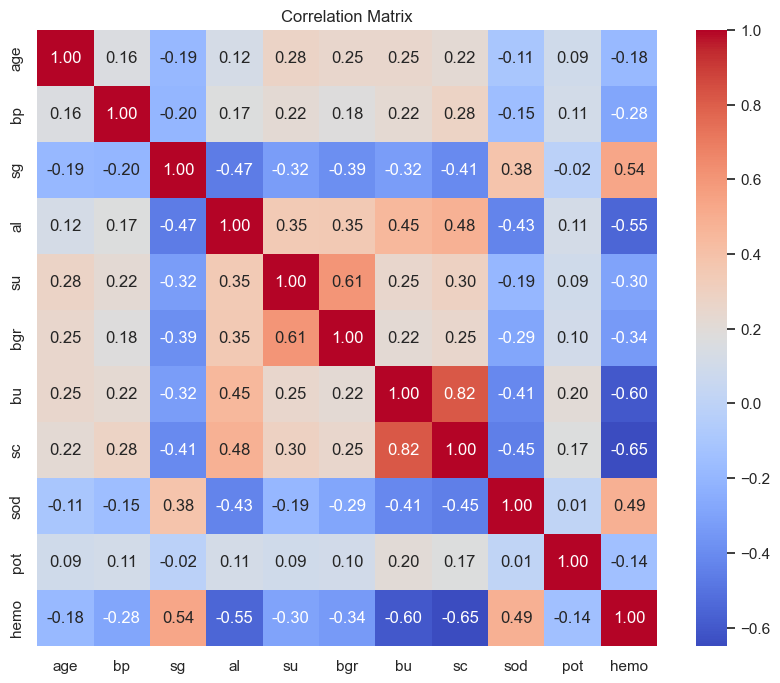

In [26]:
# Correlation heatmap for numerical columns
numerical_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

corr_matrix = dataset[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


In [27]:
# Compute the correlation matrix
correlation_matrix = dataset[numerical_cols].corr()

# Identify positive and negative correlations
positive_correlations = correlation_matrix[correlation_matrix > 0].stack()
negative_correlations = correlation_matrix[correlation_matrix < 0].stack()

print("\nPositive Correlations:")
print(positive_correlations)

print("\nNegative Correlations:")
print(negative_correlations)


Positive Correlations:
age   age     1.000000
      bp      0.159943
      al      0.120485
      su      0.276908
      bgr     0.250142
                ...   
pot   sod     0.008222
      pot     1.000000
hemo  sg      0.535696
      sod     0.486247
      hemo    1.000000
Length: 75, dtype: float64

Negative Correlations:
age   sg     -0.187254
      sod    -0.107452
      hemo   -0.181032
bp    sg     -0.200956
      sod    -0.153265
      hemo   -0.281902
sg    age    -0.187254
      bp     -0.200956
      al     -0.465623
      su     -0.324798
      bgr    -0.386874
      bu     -0.324480
      sc     -0.407006
      pot    -0.017684
al    sg     -0.465623
      sod    -0.431019
      hemo   -0.548717
su    sg     -0.324798
      sod    -0.192634
      hemo   -0.301127
bgr   sg     -0.386874
      sod    -0.286835
      hemo   -0.339362
bu    sg     -0.324480
      sod    -0.410793
      hemo   -0.599158
sc    sg     -0.407006
      sod    -0.449948
      hemo   -0.648984
sod  

## T-Test

In [28]:
from scipy.stats import ttest_ind

ckd_bp = dataset[dataset['classification'] == 'ckd']['bp']
non_ckd_bp = dataset[dataset['classification'] == 'notckd']['bp']
t_stat, p_value = ttest_ind(ckd_bp, non_ckd_bp, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 6.441156885838853, P-value: 3.441376010177605e-10
